# KMeans

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import numpy as np

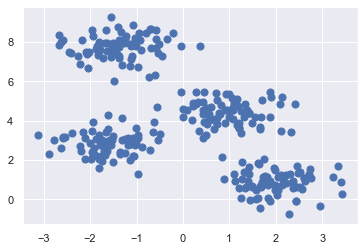

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


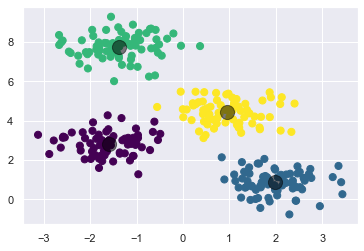

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [8]:
class MyKMeans:
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        pass
    
    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(np.arange(len(X)), self.k,replace=False)] # fix me
        if self.method == 'k-means++':
            pass
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            if (new_centroids == self.centroids).all(): # fix me
                break
            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        m,n = X.shape
        clusters=np.ones(m)
        for i,j in enumerate(X):
            a=np.linalg.norm(centroids-j,axis=1)
            clusters[i] = np.argmin(a)
        
        return clusters

    def maximization(self, X, clusters):
        new_centroids=[]
        for i in range(self.k):
            new_centroids.append(X[clusters==i].mean(axis=0))
        return np.array(new_centroids)    
        
    def predict(self, X):
        return self.expectation(X, self.centroids)
    


In [9]:
kmeans = MyKMeans(k=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ValueError: alpha (2) is outside 0-1 range

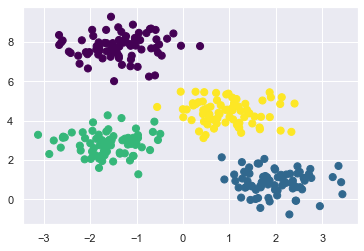

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=2);

# Agglomerative Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

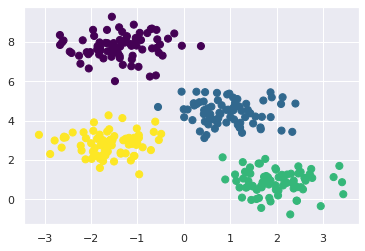

In [44]:
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=10)
y_ac = ac.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_ac, s=50, cmap='viridis')

In [5]:
np.linalg.norm(np.array([1,2]))

2.23606797749979

In [11]:
np.random.choice([0,1],2)

array([0, 0])

In [23]:
import numpy as np

def calculate_silhouette_score(X, labels):
   
    
    num_samples = X.shape[0]
    cluster_labels = np.unique(labels)
    num_clusters = len(cluster_labels)

    if num_clusters == 1:
        return 0.0

    
    distances = np.zeros((num_samples, num_samples))
    for i in range(num_samples):
        for j in range(num_samples):
            distances[i, j] = np.linalg.norm(X[i] - X[j])
            #distances[j, i] = distances[i, j]
        
    
    a = np.zeros(num_samples)
    for i in range(num_samples):
        mask = (labels == labels[i])
        print(mask)
        mask[i] = False
        num_points = np.sum(mask)
        if num_points > 0:
            a[i] = np.sum(distances[i, mask]) / num_points

   
    b = np.zeros(num_samples)
    for i in range(num_samples):
        min_dist = np.inf
        for j in range(num_clusters):
            if j != labels[i]:
                mask = (labels == j)
                dist = np.sum(distances[i, mask]) / np.sum(mask)
                min_dist = min(min_dist, dist)
        b[i] = min_dist

    
    silhouette_scores = np.zeros(num_samples)
    for i in range(num_samples):
        max_dist = max(a[i], b[i])
        silhouette_scores[i] = (b[i] - a[i]) / max_dist

    silhouette_avg = np.mean(silhouette_scores)
    return silhouette_avg


In [24]:
calculate_silhouette_score(X,y_kmeans)

[ True False False False  True  True False False False False False False
 False False  True False False  True False False  True  True False False
 False False  True False False False False False False False False False
 False False False  True False False False False False False False False
 False  True False  True False  True  True False False False False  True
 False False False False False False False  True False False False False
 False False False False False False  True False  True False  True  True
 False False  True False False False False  True False False False False
  True  True False False False  True False  True False  True  True False
 False False False False  True False  True False False  True  True False
 False  True False  True  True  True  True False  True False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False  True False
 False False  True False False False False  True Fa

  True False False False  True  True  True False False False  True False]
[False False False False False False  True False False False  True False
 False False False False False False  True  True False False False  True
  True False False False  True False False False False False False False
 False False  True False False  True False False  True  True False  True
 False False  True False False False False  True False  True False False
 False False False  True  True  True False False False  True False  True
 False  True  True False  True False False False False False False False
 False False False False False False False False False  True  True False
 False False False  True False False False False False False False False
 False False  True  True False False False False False False False False
  True False  True False False False False  True False  True False  True
  True False False  True  True False False False False  True False  True
 False  True False False False False False False F

0.6819938690643478